In [37]:
import pandas as pd
import re
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
salons_df = pd.read_csv("HairSalons.csv")

In [3]:
salons_df.head(25)

,Stars,Page_URL,Page_Title,Field2,Services
0,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/urban-betty-austin-3?...,Urban Betty - 128 Photos & 537 Reviews - Hair ...,$$,Blowout Services ...
1,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/method-hair-austin?os...,Method.Hair - 83 Photos & 420 Reviews - Hair S...,$$,NaN
2,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/red-stella-hair-salon...,Red Stella Hair Salon - 339 Photos & 281 Revie...,$$,Acne Treatments ...
3,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/topaz-salon-austin?os...,Topaz Salon - 29 Photos & 243 Reviews - Hair S...,$$,NaN
4,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/garbo-a-salon-and-spa...,Garbo A Salon and Spa - 54 Photos & 239 Review...,$$,Beards & Mustaches ...
5,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/frenchys-beauty-parlo...,Frenchy’s Beauty Parlor - 29 Photos & 224 Revi...,$$,Blowout Services ...
6,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/black-orchid-salon-au...,Black Orchid Salon - 131 Photos & 217 Reviews ...,$$,NaN
7,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/cnn-hair-team-salon-a...,CNN Hair Team Salon - 186 Photos & 210 Reviews...,$$,Coloring Services ...
8,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/chuck-edwards-the-sal...,Chuck Edwards The Salon - 42 Photos & 208 Revi...,$$,NaN
9,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/benjamin-beau-salon-a...,Benjamin Beau Salon - 347 Photos & 199 Reviews...,$$,NaN


In [5]:
def get_salon_name(row):
    page_title = row["Page_Title"].split(" - ") # split page title by the dash
    return page_title[0] # The salon name is the first of the split
def get_number_of_reviews(row):
    page_title = row["Page_Title"].split(" - ")
    photos_and_reviews = page_title[1]
    split_photos_and_reviews = photos_and_reviews.split(" ")
    #print(split_photos_and_reviews)
    if(len(split_photos_and_reviews) < 4): # if there isn't enough data here, then there likely aren't any reviews
        return 0
    while True:
        try:
            reviews = int(split_photos_and_reviews[3])
            return (reviews)
        except ValueError:
            return 0
def get_number_of_reviews(row):
    page_title = row["Page_Title"].split(" - ")
    photos_and_reviews = page_title[1]
    split_photos_and_reviews = photos_and_reviews.split(" ")
    #print(split_photos_and_reviews)
    if(len(split_photos_and_reviews) < 4): # if there isn't enough data here, then there likely aren't any reviews
        return 0
    while True:
        try:
            reviews = int(split_photos_and_reviews[3])
            return (reviews)
        except ValueError:
            return 0
def get_address(row):
    page_title = row["Page_Title"].split(" - ")
    for i in page_title:
        if ("Austin, TX" in i): # look for strings that contain the city name as it'll most likely be the address
            return i
def get_price(row):
    price = row["Field2"]
    return price

In [6]:
# Get the number of stars for a company
def get_stars(row):
    stars_row = row["Stars"]
    if (pd.isnull(stars_row)):
        return -1
    result = re.search('alt="(.*)"', stars_row) # splits the data into ---4.5 star rating" height="303" width="84---
    split_result = result.group(1).split(" ") # Split up the previous text from before
    stars = split_result[0]
    return(stars)

In [7]:
def get_services(row):
    services_ugly = row["Services"] # get the services stuff in its ugliest form
    if (type(services_ugly) != str):
        return ""
    services_split = services_ugly.split("  ")
    services = ""
    for i in services_split:
        keep = 0
        while True:
            try:
                if (i[0] == " "):
                    i = i[1:]
                    keep = 1
                elif (i[0] != " "):
                    i = i
                    keep = 1
                if (services == "" and keep):
                    services = i
                elif (keep):
                    services = services + ", " + i
                break
            except:
                break
    return services

In [49]:
salons_df["Title"] = salons_df.apply(get_salon_name, axis=1)
salons_df["Number_of_reviews"] = salons_df.apply(get_number_of_reviews, axis=1)
salons_df["Address"] = salons_df.apply(get_address, axis=1)
salons_df["Star Rating"] = salons_df.apply(get_stars, axis=1)
salons_df["Price"] = salons_df.apply(get_price, axis=1)
salons_df["Service list"] = salons_df.apply(get_services, axis=1)
salons_df.head(100)

,Stars,Page_URL,Page_Title,Field2,Services,Title,Number_of_reviews,Address,Star Rating,Price,Service list,Reviews_gt_15,Has_Reviews_gt_15
0,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/urban-betty-austin-3?...,Urban Betty - 128 Photos & 537 Reviews - Hair ...,$$,Blowout Services ...,Urban Betty,537,"1206 W 38th St, Rosedale, Austin, TX",4.5,$$,"Blowout Services, Bridal Services, Coloring Se...",537,1
160,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/milk-honey-austin-2?o...,milk + honey - 109 Photos & 492 Reviews - Day ...,$$$,Anti-aging Treatments ...,milk + honey,492,"100A Guadalupe St, Warehouse District, Austin, TX",4.0,$$$,"Anti-aging Treatments, Body Massages, Body Tre...",492,1
1,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/method-hair-austin?os...,Method.Hair - 83 Photos & 420 Reviews - Hair S...,$$,NaN,Method.Hair,420,"1601 E 5th St, East Austin, Austin, TX",4.5,$$,,420,1
330,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/viva-day-spa-lamar-au...,Viva Day Spa Lamar - 54 Photos & 331 Reviews -...,$$$,Acne Treatments ...,Viva Day Spa Lamar,331,"215 S Lamar Blvd, Bouldin Creek, Austin, TX",4.5,$$$,"Acne Treatments, Anti-aging Treatments, Back T...",331,1
130,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/birds-barbershop-aust...,Birds Barbershop - 18 Photos & 302 Reviews - H...,$$,Beards & Mustaches ...,Birds Barbershop,302,"6800 Burnet Rd, Allandale, Austin, TX",4.0,$$,"Beards & Mustaches, Blowout Services, Coloring...",302,1
419,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/floyds-99-barbershop-...,Floyd’s 99 Barbershop - 51 Photos & 290 Review...,$$,NaN,Floyd’s 99 Barbershop,290,"10515 N Mopac Expy, Austin, TX",4.0,$$,,290,1
818,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/massage-sway-austin?o...,Massage Sway - 98 Photos & 290 Reviews - Day S...,$$,Acne Treatments ...,Massage Sway,290,"11011 Domain Dr, Austin, TX",4.5,$$,"Acne Treatments, Anti-aging Treatments, Back T...",290,1
2,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/red-stella-hair-salon...,Red Stella Hair Salon - 339 Photos & 281 Revie...,$$,Acne Treatments ...,Red Stella Hair Salon,281,"5117 N Lamar Blvd, Austin, TX",4.5,$$,"Acne Treatments, Anti-aging Treatments, Blowou...",281,1
558,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/queen-spa-austin?osq=...,Queen Spa - 330 Photos & 247 Reviews - Skin Ca...,$$,NaN,Queen Spa,247,"2110 S Lamar Blvd, South Lamar District, Austi...",4.5,$$,,247,1
596,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/golden-nails-salon-an...,Golden Nails Salon & Spa - 389 Photos & 245 Re...,$$,Acrylic Fill-In ...,Golden Nails Salon & Spa,245,"8213 Brodie Ln, Austin, TX",4.0,$$,"Acrylic Fill-In, Acrylic Full Set, Acrylic Nai...",245,1


In [48]:
salons_df.sort_values(by=['Number_of_reviews'], ascending=False, inplace=True)
pd.set_option('display.max_rows', 500)
salons_df.Title[:]

0                                            Urban Betty
160                                         milk + honey
1                                            Method.Hair
330                                   Viva Day Spa Lamar
130                                     Birds Barbershop
419                                Floyd’s 99 Barbershop
818                                         Massage Sway
2                                  Red Stella Hair Salon
558                                            Queen Spa
596                             Golden Nails Salon & Spa
3                                            Topaz Salon
4                                  Garbo A Salon and Spa
340                                    LACQUER® Downtown
5                                Frenchy’s Beauty Parlor
872                        Austin Venetian Nails and Spa
925                              Arboretum Nails and Spa
6                                     Black Orchid Salon
50                            J

In [9]:
salons_df.Number_of_reviews.sum()

21935

In [10]:
def get_number_of_reviews_gt_15(row):
    page_title = row["Page_Title"].split(" - ")
    photos_and_reviews = page_title[1]
    split_photos_and_reviews = photos_and_reviews.split(" ")
    #print(split_photos_and_reviews)
    if(len(split_photos_and_reviews) < 4): # if there isn't enough data here, then there likely aren't any reviews
        return 0
    while True:
        try:
            reviews = int(split_photos_and_reviews[3])
            if (reviews > 15):
                return reviews
            else:
                return 0
        except ValueError:
            return 0
def salon_has_gt_15_reviews(row):
    page_title = row["Page_Title"].split(" - ")
    photos_and_reviews = page_title[1]
    split_photos_and_reviews = photos_and_reviews.split(" ")
    #print(split_photos_and_reviews)
    if(len(split_photos_and_reviews) < 4): # if there isn't enough data here, then there likely aren't any reviews
        return 0
    while True:
        try:
            reviews = int(split_photos_and_reviews[3])
            if (reviews > 15):
                return 1
            else:
                return 0
        except ValueError:
            return 0

In [11]:
salons_df["Reviews_gt_15"] = salons_df.apply(get_number_of_reviews_gt_15, axis=1)
salons_df["Has_Reviews_gt_15"] = salons_df.apply(salon_has_gt_15_reviews, axis=1)

salons_df.head()

,Stars,Page_URL,Page_Title,Field2,Services,Title,Number_of_reviews,Address,Star Rating,Price,Service list,Reviews_gt_15,Has_Reviews_gt_15
0,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/urban-betty-austin-3?...,Urban Betty - 128 Photos & 537 Reviews - Hair ...,$$,Blowout Services ...,Urban Betty,537,"1206 W 38th St, Rosedale, Austin, TX",4.5,$$,"Blowout Services, Bridal Services, Coloring Se...",537,1
1,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/method-hair-austin?os...,Method.Hair - 83 Photos & 420 Reviews - Hair S...,$$,NaN,Method.Hair,420,"1601 E 5th St, East Austin, Austin, TX",4.5,$$,,420,1
2,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/red-stella-hair-salon...,Red Stella Hair Salon - 339 Photos & 281 Revie...,$$,Acne Treatments ...,Red Stella Hair Salon,281,"5117 N Lamar Blvd, Austin, TX",4.5,$$,"Acne Treatments, Anti-aging Treatments, Blowou...",281,1
3,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/topaz-salon-austin?os...,Topaz Salon - 29 Photos & 243 Reviews - Hair S...,$$,NaN,Topaz Salon,243,"1509 S Lamar Blvd, Bouldin Creek, Austin, TX",4.5,$$,,243,1
4,"<img class=""offscreen"" src=""https://s3...",https://www.yelp.com/biz/garbo-a-salon-and-spa...,Garbo A Salon and Spa - 54 Photos & 239 Review...,$$,Beards & Mustaches ...,Garbo A Salon and Spa,239,"7739 Northcross Dr, Allandale, Austin, TX",4.5,$$,"Beards & Mustaches, Blowout Services, Bridal S...",239,1


In [12]:
salons_df.iloc[1][2]

'Method.Hair - 83 Photos & 420 Reviews - Hair Salons - 1601 E 5th St, East Austin, Austin, TX - Phone Number - Yelp'

In [18]:
for i in range (0, min(5,3)):
    print (i)

0
1
2


In [13]:
salons_df.Has_Reviews_gt_15.sum()

264

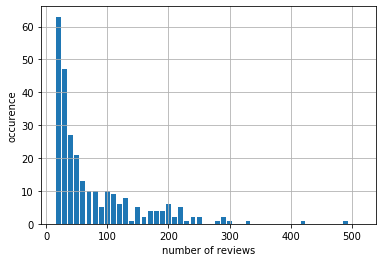

In [14]:
salons_df.Number_of_reviews.hist(bins = 50, rwidth = 0.8, range = (15, 515))
plt.xlabel("number of reviews")
plt.ylabel("occurence")
plt.savefig("reviews.png")
plt.show()

Reshape into a newer, cleaner dataframe to load to the database

In [15]:
salons_clean = salons_df.copy()
salons_clean.drop(["Page_Title", "Stars", "Page_URL", "Services", "Field2"], axis=1, inplace = True)
salons_clean.head()
salons_clean.shape

(950, 8)

Once all the data is put into a pandas dataframe, convert that to a SQL database

In [21]:
f=open("db.txt", "r")
contents = 0
if not(contents):
    contents = f.read()
username = contents.split("\n")[0]
password = contents.split("\n")[1]
dbname = 'salons_db'

In [22]:
engine = create_engine('postgres://%s:%s@localhost/%s'%(username,password, dbname))

In [23]:
if not database_exists(engine.url):
    create_database(engine.url)
print(database_exists(engine.url))

True


In [195]:
salons_clean.to_sql('salons_data_table', engine, if_exists='replace')

In [24]:
con = None
con = psycopg2.connect(database = dbname, user = username, password = password, port=5432, host= "/var/run/postgresql/")

# query:
sql_query = """
SELECT * FROM salons_data_table;
"""
salons_data_from_sql = pd.read_sql_query(sql_query,con)
salons_data_from_sql.head()

,index,Title,Number_of_reviews,Address,Star Rating,Price,Service list
0,0,Urban Betty,537,"1206 W 38th St, Rosedale, Austin, TX",4.5,$$,"Blowout Services, Bridal Services, Coloring Se..."
1,1,Method.Hair,420,"1601 E 5th St, East Austin, Austin, TX",4.5,$$,
2,2,Red Stella Hair Salon,281,"5117 N Lamar Blvd, Austin, TX",4.5,$$,"Acne Treatments, Anti-aging Treatments, Blowou..."
3,3,Topaz Salon,243,"1509 S Lamar Blvd, Bouldin Creek, Austin, TX",4.5,$$,
4,4,Garbo A Salon and Spa,239,"7739 Northcross Dr, Allandale, Austin, TX",4.5,$$,"Beards & Mustaches, Blowout Services, Bridal S..."


In [25]:
Urban_Betty = salons_data_from_sql[salons_data_from_sql.Title == "Urban Betty"]

In [ ]:
Urban_Betty = Urban_Betty.drop(axis = 1, columns=["index"])


In [36]:
Urban_Betty.sort_values(by=['Number_of_reviews'], ascending=False, inplace=True)
Urban_Betty.iloc[0][5]

"Blowout Services, Bridal Services, Coloring Services, Hair Extension Services, Hair Treatment Services, Hairstyling Services, Makeup Services, Men's Haircuts, Products for Sale, Updo Hairstyles, Women's Haircuts"